In [ ]:
import shutil

shutil.copy("/content/drive/My Drive/yolo-object-detection/yolo-coco/coco.names","/content")
shutil.copy("/content/drive/My Drive/yolo-object-detection/yolo-coco/yolov3.cfg","/content")
shutil.copy("/content/drive/My Drive/yolo-object-detection/yolo-coco/yolov3.weights","/content")


shutil.copy("/content/drive/My Drive/yolo-object-detection/images/baggage_claim.jpg","/content")


'/content/baggage_claim.jpg'

[INFO] loading YOLO from disk...
[INFO] YOLO took 2.276685 seconds


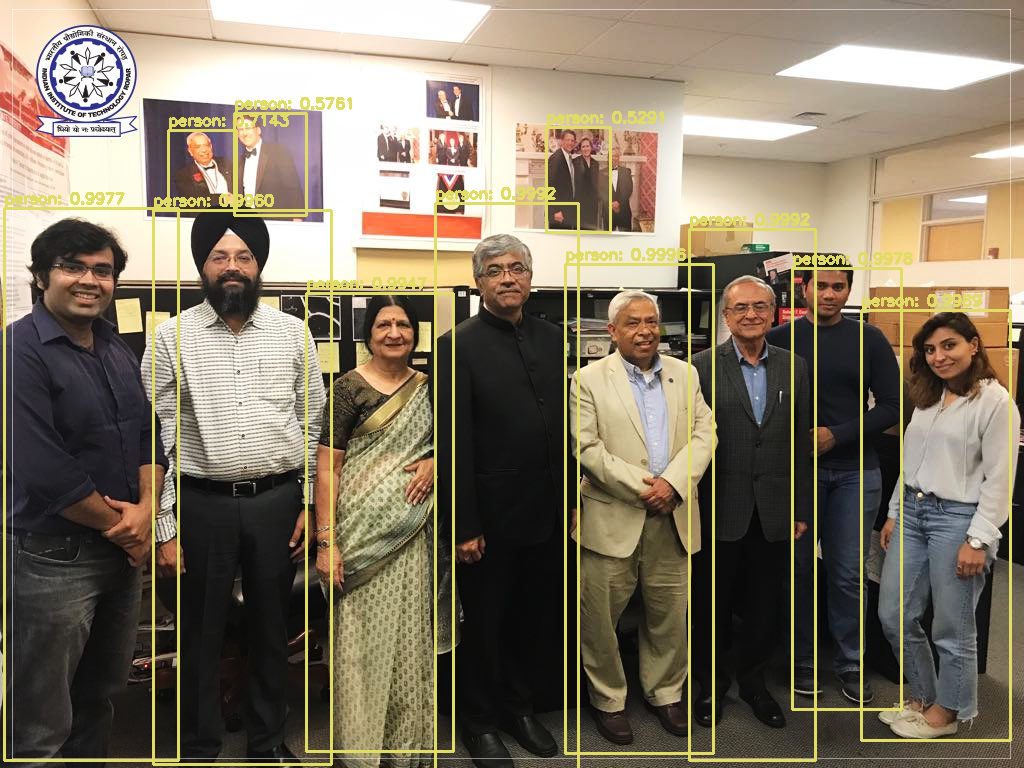

-1

In [ ]:

from google.colab.patches import cv2_imshow
import numpy as np
import argparse
import time
import cv2
import os



path="/content/coco.names"
labelsPath = path
LABELS = open(labelsPath).read().strip().split("\n")

np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),
	dtype="uint8")

path_weights="/content/yolov3.weights"
path_model="/content/yolov3.cfg"
weightsPath = path_weights
configPath = path_model

print("[INFO] loading YOLO from disk...")
net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

image = cv2.imread("/content/demo4.jpg")																			#---insert path of image here
(H, W) = image.shape[:2]


ln = net.getLayerNames()
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]


blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),
	swapRB=True, crop=False)
net.setInput(blob)
start = time.time()
layerOutputs = net.forward(ln)
end = time.time()


print("[INFO] YOLO took {:.6f} seconds".format(end - start))

boxes = []
confidences = []
classIDs = []

for output in layerOutputs:

	for detection in output:
		
		scores = detection[5:]
		classID = np.argmax(scores)
		confidence = scores[classID]

		
		if confidence > 0.5:
			
			box = detection[0:4] * np.array([W, H, W, H])
			(centerX, centerY, width, height) = box.astype("int")

			
			x = int(centerX - (width / 2))
			y = int(centerY - (height / 2))

			boxes.append([x, y, int(width), int(height)])
			confidences.append(float(confidence))
			classIDs.append(classID)


idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5,
	0.3)

if len(idxs) > 0:

	for i in idxs.flatten():
	
		(x, y) = (boxes[i][0], boxes[i][1])
		(w, h) = (boxes[i][2], boxes[i][3])

		
		color = [int(c) for c in COLORS[classIDs[i]]]
		cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
		text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
		cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
			0.5, color, 2)


cv2_imshow(image)
cv2.imwrite("demo_yolo3.jpg",image)
cv2.waitKey(0)